# 2. Tutorial - Intermediate

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Artist tutorial
http://matplotlib.org/users/artists.html

There are **three layers** to the matplotlib API.  
1. The matplotlib.backend_bases.FigureCanvas is the area onto which the figure is drawn,  
2. the matplotlib.backend_bases.Renderer is the object which knows how to draw on the FigureCanvas, and  
3. the matplotlib.artist.Artist is the object that knows how to use a renderer to paint onto the canvas.   

The FigureCanvas and Renderer handle all the details of talking to user interface toolkits like wxPython or drawing languages like PostScript®, and the Artist handles all the high level constructs like representing and laying out the figure, text, and lines. The typical user will spend 95% of his time working with the Artists.

There are **two types of Artists**: primitives and containers. 
1. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and 
2. the containers are places to put them (Axis, Axes and Figure). 

The standard use is to create a Figure instance, use the Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives.   

In the example below, we create a Figure instance using matplotlib.pyplot.figure(), which is a convenience method for instantiating Figure instances and connecting them with your user interface or drawing toolkit FigureCanvas. As we will discuss below, this is not necessary – you can work directly with PostScript, PDF Gtk+, or wxPython FigureCanvas instances, instantiate your Figures directly and connect them yourselves – but since we are focusing here on the Artist API we’ll let pyplot handle some of those details for us:

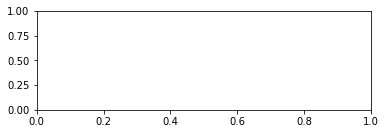

In [2]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)  # two rows, one column, first plot
ax

The **Axes** is probably the most important class in the matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods ***(plot(), text(), hist(), imshow())*** to create the most common graphics primitives ***(Line2D, Text, Rectangle, Image, respectively)***. These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested. Most of you are probably familiar with the ***Subplot***, which is just a special case of an Axes that lives on a regular rows by columns grid of Subplot instances. If you want to create an Axes at an arbitrary location, simply use the ***add_axes()*** method which takes a list of ***[left, bottom, width, height] *** values in 0-1 relative figure coordinates:

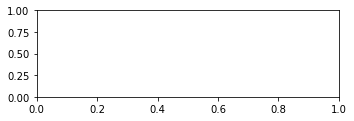

In [3]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

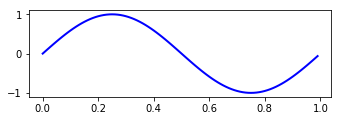

In [4]:
plt.close('all')

import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t) 

fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])
# ax = fig.add_subplot(2, 1, 1)  # two rows, one column, first plot

line, = ax.plot(t, s, color='blue', lw=2) 

In this example, ***ax*** is the Axes instance created by the ***fig.add_subplot*** call above (remember Subplot is just a subclass of Axes) and when you call ***ax.plot***, it creates a Line2D instance and adds it to the ***Axes.lines*** list. In the interactive ipython session below, you can see that the Axes.lines list is length one and contains the same line that was returned by the line, = ax.plot... call:

In [5]:
ax.lines[0]

In [6]:
line

If you make subsequent calls to ax.plot (and the hold state is “on” which is the default) then additional lines will be added to the list. You can remove lines later simply by calling the list methods; either of these will work:

In [7]:
# del ax.lines[0]
ax.lines.remove(line)  # one or the other, not both!

The Axes also has helper methods to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

In [8]:
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

When you call ax.set_xlabel, it passes the information on the Text instance of the XAxis. Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.

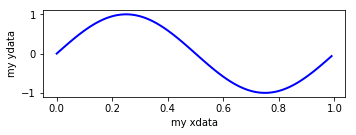

In [9]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t) 

fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])
# ax = fig.add_subplot(2, 1, 1)  # two rows, one column, first plot

line, = ax.plot(t, s, color='blue', lw=2) 

xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

## Customizing your objects

Every element in the figure is represented by a matplotlib ***Artist***, and each has an extensive list of properties to configure its appearance. The figure itself contains a ***Rectangle*** exactly the size of the figure, which you can use to set the background color and transparency of the figures. Likewise, each ***Axes*** bounding box (the standard white box with black edges in the typical matplotlib plot, has a Rectangle instance that determines the color, transparency, and other properties of the Axes. These instances are stored as member variables ***Figure.patch*** and ***Axes.patch*** (“Patch” is a name inherited from MATLAB, and is a 2D “patch” of color on the figure, e.g., rectangles, circles and polygons). Every matplotlib Artist has the following properties:
```
Property	Description
alpha	The transparency - a scalar from 0-1
animated	A boolean that is used to facilitate animated drawing
axes	The axes that the Artist lives in, possibly None
clip_box	The bounding box that clips the Artist
clip_on	Whether clipping is enabled
clip_path	The path the artist is clipped to
contains	A picking function to test whether the artist contains the pick point
figure	The figure instance the artist lives in, possibly None
label	A text label (e.g., for auto-labeling)
picker	A python object that controls object picking
transform	The transformation
visible	A boolean whether the artist should be drawn
zorder	A number which determines the drawing order
rasterized	Boolean; Turns vectors into rastergraphics: (for compression & eps transparency)
```

Each of the properties is accessed with an old-fashioned setter or getter (yes we know this irritates Pythonistas and we plan to support direct access via properties or traits but it hasn’t been done yet). For example, to multiply the current alpha by a half:
```
a = o.get_alpha()
o.set_alpha(0.5*a)
```
If you want to set a number of properties at once, you can also use the set method with keyword arguments. For example:
```
o.set(alpha=0.5, zorder=2)
```
If you are working interactively at the python shell, a handy way to inspect the Artist properties is to use the ***matplotlib.artist.getp()*** function (simply getp() in pylab), which lists the properties and their values. This works for classes derived from Artist as well, e.g., Figure and Rectangle. Here are the Figure rectangle properties mentioned above:

In [10]:
getp(line)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    axes = Axes(0.15,0.1;0.7x0.3)
    children = []
    clip_box = TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), Co...
    clip_on = True
    clip_path = None
    color or c = blue
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05, ...
    drawstyle = default
    figure = Figure(432x288)
    fillstyle = full
    gid = None
    label = _line0
    linestyle or ls = -
    linewidth or lw = 2.0
    marker = None
    markeredgecolor or mec = blue
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = blue
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[  0.00000000e+00,   0.00000000e+00], ...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = None
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    sol

In [11]:
getp(fig)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._axes.Axes object at 0x7f8f4a7fa...
    children = [<matplotlib.patches.Rectangle object at 0x7f8f701...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._axes.Axes object at 0x7f8f4a7fa...
    dpi = 72.0
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [ 6.  4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(Bbox([[0.0, 0.0], [6.0, 4.0]]), Af...
    zorder = 0


In [12]:
matplotlib.artist.getp(fig.patch)

    aa = False
    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    axes = None
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], ...
    ec = (1.0, 1.0, 1.0, 0.0)
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    ls = solid
    lw = 0.0
    patch_transform = CompositeGenericTransform(BboxTransformTo(Bbox([[0...
    path = Path(array([[ 0.,  0.],        [ 1.,  0.],        ...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None


The docstrings for all of the classes also contain the Artist properties, so you can consult the interactive “help” or the artist Module for a listing of properties for a given object.

In [13]:
line?

## Object containers

Now that we know how to inspect and set the properties of a given object we want to configure, we need to now how to get at that object. As mentioned in the introduction, there are two kinds of objects: primitives and containers. The primitives are usually the things you want to configure (the font of a Text instance, the width of a Line2D) although the containers also have some properties as well – for example the Axes Artist is a container that contains many of the primitives in your plot, but it also has properties like the xscale to control whether the xaxis is ‘linear’ or ‘log’. In this section we’ll review where the various container objects store the Artists that you want to get at.

## Figure container

The top level container Artist is the ***matplotlib.figure.Figure***, and it contains everything in the figure. The background of the figure is a Rectangle which is stored in ***Figure.patch***. As you add subplots (add_subplot()) and axes (add_axes()) to the figure these will be appended to the ***Figure.axes***. These are also returned by the methods that create them:

In [14]:
fig = plt.figure() 

In [15]:
ax1 = fig.add_subplot(211)
ax1

In [16]:
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
ax2

In [17]:
fig.axes

Because the figure maintains the concept of the “current axes” (see Figure.gca and Figure.sca) to support the pylab/pyplot state machine, you should not insert or remove axes directly from the axes list, but rather use the ***add_subplot()*** and ***add_axes()*** methods to insert, and the ***delaxes()*** method to delete. You are free however, to iterate over the list of axes or index into it to get access to Axes instances you want to customize. Here is an example which turns all the axes grids on:

In [18]:
for ax in fig.axes:
    ax.grid(True)

The figure also has its own text, lines, patches and images, which you can use to add primitives directly. The default coordinate system for the Figure will simply be in pixels (which is not usually what you want) but you can control this by setting the transform property of the Artist you are adding to the figure.

More useful is “figure coordinates” where (0, 0) is the bottom-left of the figure and (1, 1) is the top-right of the figure which you can obtain by setting the Artist transform to ***fig.transFigure***:

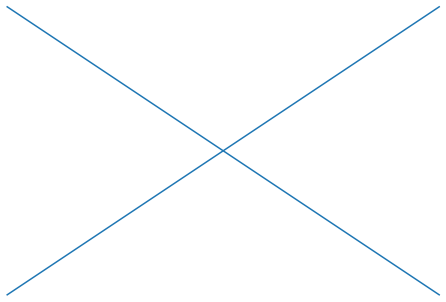

In [19]:
fig = plt.figure()
l1 = matplotlib.lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = matplotlib.lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])
fig.canvas.draw()

Here is a summary of the Artists the figure contains
```
Figure attribute	Description
axes	A list of Axes instances (includes Subplot)
patch	The Rectangle background
images	A list of FigureImages patches - useful for raw pixel display
legends	A list of Figure Legend instances (different from Axes.legends)
lines	A list of Figure Line2D instances (rarely used, see Axes.lines)
patches	A list of Figure patches (rarely used, see Axes.patches)
texts	A list Figure Text instances
```

## Axes container

The ***matplotlib.axes.Axes*** is the center of the matplotlib universe – it contains the vast majority of all the Artists used in a figure with many helper methods to create and add these Artists to itself, as well as helper methods to access and customize the Artists it contains. Like the Figure, it contains a ***Patch*** patch which is a ***Rectangle*** for Cartesian coordinates and a ***Circle*** for polar coordinates; this patch determines the shape, background and border of the plotting region:

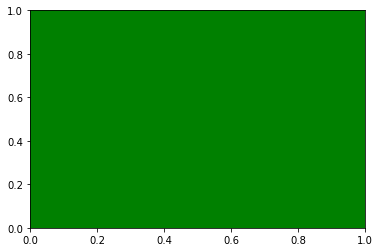

In [20]:
fig = plt.gcf()
ax = fig.add_subplot(111)
rect = ax.patch  # a Rectangle instance
rect.set_facecolor('green')
plt.show()

When you call a plotting method, e.g., the canonical plot() and pass in arrays or lists of values, the method will create a ***matplotlib.lines.Line2D()*** instance, update the line with all the Line2D properties passed as keyword arguments, ***add the line to the Axes.lines*** container, and returns it to you:

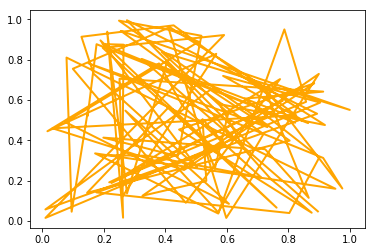

In [21]:
ax = plt.gca()
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)
line.set_color('orange')

plot returns ***a list of lines*** because you can pass in multiple x, y pairs to plot, and we are unpacking the first element of the length one list into the line variable. The line has been added to the ***Axes.lines*** list:

In [22]:
ax.lines

Similarly, methods that create patches, like bar() creates a list of rectangles, will add the patches to the Axes.patches list:

In [23]:
n, bins, rectangles = ax.hist(np.random.randn(1000), 50, facecolor='yellow')
rectangles

<a list of 50 Patch objects>

In [24]:
len(ax.patches)

50

You should not add objects directly to the Axes.lines or Axes.patches lists unless you know exactly what you are doing, because the Axes needs to do a few things when it creates and adds an object. It sets the figure and axes property of the Artist, as well as the default Axes transformation (unless a transformation is set). It also inspects the data contained in the Artist to update the data structures controlling auto-scaling, so that the view limits can be adjusted to contain the plotted data. You can, nonetheless, create objects yourself and add them directly to the Axes using helper methods like ***add_line()*** and ***add_patch()***. Here is an annotated interactive session illustrating what is going on:

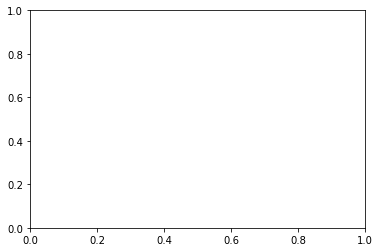

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# create a rectangle instance
rect = matplotlib.patches.Rectangle( (1,1), width=5, height=12)
rect

In [26]:
# by default the axes instance is None
rect.axes

In [27]:
# and the transformation instance is set to the "identity transform"
rect.get_transform()

CompositeGenericTransform(BboxTransformTo(Bbox([[1.0, 1.0], [6.0, 13.0]])), Affine2D(array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])))

In [28]:
# now we add the Rectangle to the Axes
ax.add_patch(rect)

# and notice that the ax.add_patch method has set the axes
# instance
rect.axes

In [29]:
# and the transformation has been set too
rect.get_transform()

CompositeGenericTransform(CompositeGenericTransform(BboxTransformTo(Bbox([[1.0, 1.0], [6.0, 13.0]])), Affine2D(array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]]))), CompositeGenericTransform(TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())), CompositeGenericTransform(BboxTransformFrom(TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())))), BboxTransformTo(TransformedBbox(Bbox([[0.125, 0.125], [0.9, 0.88]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [6.0, 4.0]]), Affine2D(array([[ 72.,   0.,   0.],
       [  0.,  72.,   0.],
       [  0.,   0.,   1.]])))))))))

In [30]:
# the default axes transformation is ax.transData
ax.transData

CompositeGenericTransform(TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())), CompositeGenericTransform(BboxTransformFrom(TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())))), BboxTransformTo(TransformedBbox(Bbox([[0.125, 0.125], [0.9, 0.88]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [6.0, 4.0]]), Affine2D(array([[ 72.,   0.,   0.],
       [  0.,  72.,   0.],
       [  0.,   0.,   1.]]))))))))

In [31]:
rect.get_transform() is ax.transData

False

In [32]:
# notice that the xlimits of the Axes have not been changed
ax.get_xlim()

(0.0, 1.0)

In [33]:
# but the data limits have been updated to encompass the rectangle
ax.dataLim.bounds

(1.0, 1.0, 5.0, 12.0)

In [34]:
# we can manually invoke the auto-scaling machinery
ax.autoscale_view()

# and now the xlim are updated to encompass the rectangle
ax.get_xlim()

(0.75, 6.25)

In [35]:
# we have to manually force a figure draw
# plt.figure = ax.figure
ax.figure.canvas.draw()
plt.show()

There are many, many Axes helper methods for creating primitive Artists and adding them to their respective containers. The table below summarizes a small sampling of them, the kinds of Artist they create, and where they store them

```
Helper method	Artist	Container
ax.annotate - text annotations	Annotate	ax.texts
ax.bar - bar charts	Rectangle	ax.patches
ax.errorbar - error bar plots	Line2D and Rectangle	ax.lines and ax.patches
ax.fill - shared area	Polygon	ax.patches
ax.hist - histograms	Rectangle	ax.patches
ax.imshow - image data	AxesImage	ax.images
ax.legend - axes legends	Legend	ax.legends
ax.plot - xy plots	Line2D	ax.lines
ax.scatter - scatter charts	PolygonCollection	ax.collections
ax.text - text	Text	ax.texts
```

In addition to all of these Artists, the Axes contains two important Artist containers: the ***XAxis*** and ***YAxis***, which handle the drawing of the ticks and labels. These are stored as instance variables ***xaxis*** and ***yaxis***. The XAxis and YAxis containers will be detailed below, but note that the Axes contains many helper methods which forward calls on to the Axis instances so you often do not need to work with them directly unless you want to. For example, you can set the font size of the XAxis ticklabels using the Axes helper method:

In [36]:
for label in ax.get_xticklabels():
    label.set_color('orange')

Below is a summary of the Artists that the Axes contains
```
Axes attribute	Description
artists	A list of Artist instances
patch	Rectangle instance for Axes background
collections	A list of Collection instances
images	A list of AxesImage
legends	A list of Legend instances
lines	A list of Line2D instances
patches	A list of Patch instances
texts	A list of Text instances
xaxis	matplotlib.axis.XAxis instance
yaxis	matplotlib.axis.YAxis instance
```

## Axis containers

The ***matplotlib.axis.Axis*** instances handle the drawing of the tick lines, the grid lines, the tick labels and the axis label. You can configure the left and right ticks separately for the y-axis, and the upper and lower ticks separately for the x-axis. The Axis also stores the data and view intervals used in auto-scaling, panning and zooming, as well as the ***Locator and Formatter*** instances which control where the ticks are placed and how they are represented as strings.

Each Axis object contains a ***label*** attribute (this is what pylab modifies in calls to ***xlabel()*** and ***ylabel()***) as well as a list of major and minor ticks. The ticks are ***XTick*** and ***YTick*** instances, which contain the actual line and text primitives that render the ticks and ticklabels. Because the ticks are dynamically created as needed (e.g., when panning and zooming), you should access the lists of major and minor ticks through their accessor methods ***get_major_ticks()*** and ***get_minor_ticks()***. Although the ticks contain all the primitives and will be covered below, the ***Axis*** methods contain accessor methods to return the tick lines, tick labels, tick locations etc.:

In [37]:
axis = ax.xaxis
axis.get_ticklocs()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [38]:
axis.get_ticklabels()

<a list of 8 Text major ticklabel objects>

In [39]:
axis.get_ticklabels()[0]

In [40]:
# note there are twice as many ticklines as labels because by
#  default there are tick lines at the top and bottom but only tick
axis.get_ticklines()

<a list of 16 Line2D ticklines objects>

In [41]:
axis.get_ticklines()[0]

In [42]:
# by default you get the major ticks back
axis.get_ticklines()

<a list of 16 Line2D ticklines objects>

In [43]:
# but you can also ask for the minor ticks
axis.get_ticklines(minor=True)

<a list of 0 Line2D ticklines objects>

Here is a summary of some of the useful accessor methods of the Axis (these have corresponding setters where useful, such as set_major_formatter)
```
Accessor method	Description
get_scale	The scale of the axis, e.g., ‘log’ or ‘linear’
get_view_interval	The interval instance of the axis view limits
get_data_interval	The interval instance of the axis data limits
get_gridlines	A list of grid lines for the Axis
get_label	The axis label - a Text instance
get_ticklabels	A list of Text instances - keyword minor=True|False
get_ticklines	A list of Line2D instances - keyword minor=True|False
get_ticklocs	A list of Tick locations - keyword minor=True|False
get_major_locator	The matplotlib.ticker.Locator instance for major ticks
get_major_formatter	The matplotlib.ticker.Formatter instance for major ticks
get_minor_locator	The matplotlib.ticker.Locator instance for minor ticks
get_minor_formatter	The matplotlib.ticker.Formatter instance for minor ticks
get_major_ticks	A list of Tick instances for major ticks
get_minor_ticks	A list of Tick instances for minor ticks
grid	Turn the grid on or off for the major or minor ticks
```

Here is an example, not recommended for its beauty, which customizes the axes and tick properties

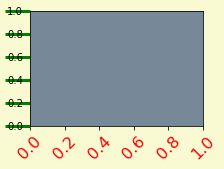

In [44]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure()
rect = fig.patch # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

## Tick containers

The ***matplotlib.axis.Tick*** is the final container object in our descent from the Figure to the Axes to the Axis to the Tick. The ***Tick*** contains the ***tick*** and ***grid line*** instances, as well as the ***label*** instances for the upper and lower ticks. Each of these is accessible directly as an attribute of the Tick. In addition, there are boolean variables that determine whether the upper labels and ticks are on for the x-axis and whether the right labels and ticks are on for the y-axis.
```
Tick attribute	Description
tick1line	Line2D instance
tick2line	Line2D instance
gridline	Line2D instance
label1	Text instance
label2	Text instance
gridOn	boolean which determines whether to draw the tickline
tick1On	boolean which determines whether to draw the 1st tickline
tick2On	boolean which determines whether to draw the 2nd tickline
label1On	boolean which determines whether to draw tick label
label2On	boolean which determines whether to draw tick label
```

Here is an example which sets the formatter for the right side ticks with dollar signs and colors them green on the right side of the yaxis

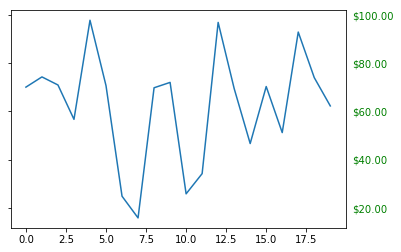

In [45]:
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True
    tick.label2.set_color('green')

plt.show()

## Legend guide
http://matplotlib.org/users/legend_guide.html

This guide makes use of some common terms, which are documented here for clarity:  

legend entry  
- A legend is made up of one or more legend entries. An entry is made up of exactly one key and one label.  

legend key
- The colored/patterned marker to the left of each legend label.  

legend label
- The text which describes the handle represented by the key.  

legend handle
- The original object which is used to generate an appropriate entry in the legend.

### Controlling the legend entries

In [46]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

The ***get_legend_handles_labels()*** function returns a list of handles/artists which exist on the Axes which can be used to generate entries for the resulting legend - it is worth noting however that ***not all artists can be added to a legend***, at which point a ***“proxy”*** will have to be created (see Creating artists specifically for adding to the legend (aka. Proxy artists) for further details).

For full control of what is being added to the legend, it is common to pass the appropriate handles directly to legend():

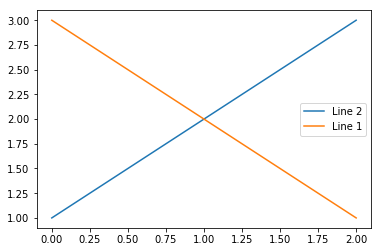

In [47]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')

plt.legend(handles=[line_up, line_down])

In some cases, it is not possible to set the label of the handle, so it is possible to pass through the list of labels to legend():

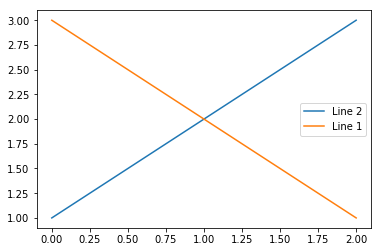

In [48]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend([line_up, line_down], ['Line 2', 'Line 1'])

## Creating artists specifically for adding to the legend (aka. Proxy artists)

Not all handles can be turned into legend entries automatically, so it is often necessary to create an artist which can. Legend handles don’t have to exists on the Figure or Axes in order to be used.

Suppose we wanted to create a legend which has an entry for some data which is represented by a red color:

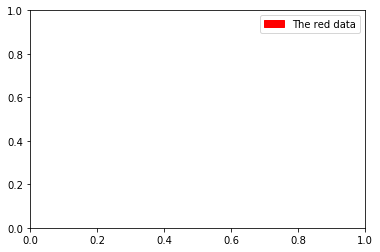

In [49]:
import matplotlib.patches as mpatches 

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

There are many supported legend handles, instead of creating a patch of color we could have created a line with a marker:

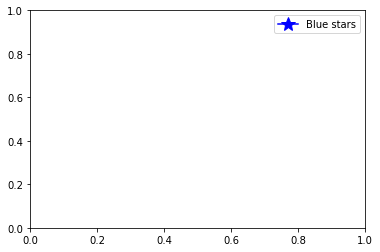

In [50]:
import matplotlib.lines as mlines 

blue_line = mlines.Line2D([], [], color='blue', marker='*', markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

### Legend location

The location of the legend can be specified by the keyword argument ***loc***. Please see the documentation at legend() for more details.

The ***bbox_to_anchor*** keyword gives a great degree of control for manual legend placement. For example, if you want your axes legend located at the figure’s top right-hand corner instead of the axes’ corner, simply specify the corner’s location, and the ***coordinate system*** of that location:

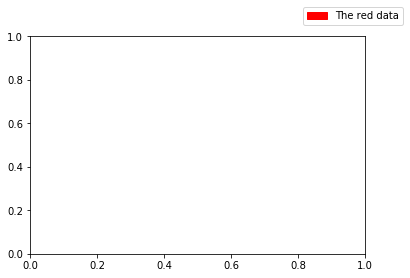

In [51]:
import matplotlib.patches as mpatches 

red_patch = mpatches.Patch(color='red', label='The red data') 

plt.legend(handles=[red_patch],
           bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure) 

plt.show()

More examples of custom legend placement:

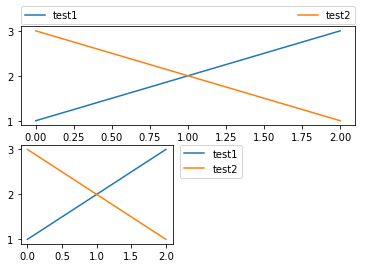

In [52]:
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
           loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Multiple legends on the same Axes

Sometimes it is more clear to split legend entries across multiple legends. Whilst the instinctive approach to doing this might be to call the legend() function multiple times, you will find that only one legend ever exists on the Axes. This has been done so that it is possible to call legend() repeatedly to update the legend to the latest handles on the Axes, so ***to persist old legend instances, we must add them manually to the Axes***:



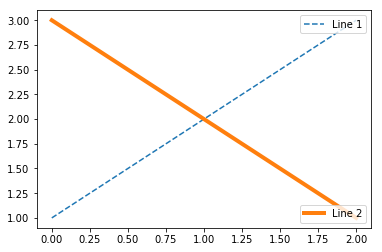

In [53]:
line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.show()

Legend Handlers
In order to create legend entries, handles are given as an argument to an appropriate ***HandlerBase*** subclass. The choice of handler subclass is determined by the following rules:

1. Update ***get_legend_handler_map()*** with the value in the handler_map keyword.
2. Check if the handle is in the newly created ***handler_map***.
3. Check if the ***type*** of handle is in the newly created handler_map.
4. Check if any of the ***types in the handle‘s mro*** is in the newly created handler_map.  

For completeness, this logic is mostly implemented in get_legend_handler().

All of this flexibility means that we have the necessary hooks to implement custom handlers for our own type of legend key.

The simplest example of using custom handlers is to instantiate one of the existing HandlerBase subclasses. For the sake of simplicity, let’s choose ***matplotlib.legend_handler.HandlerLine2D*** which accepts a numpoints argument (note numpoints is a keyword on the legend() function for convenience). We can then pass the mapping of instance to Handler as a keyword to legend.

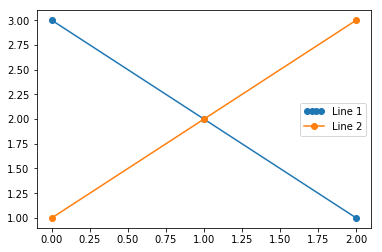

In [54]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot([3,2,1], marker='o', label='Line 1')
line2, = plt.plot([1,2,3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

As you can see, “Line 1” now has 4 marker points, where “Line 2” has 2 (the default). Try the above code, only change the map’s key from line1 to type(line1). Notice how now both Line2D instances get 4 markers.

Along with handlers for complex plot types such as errorbars, stem plots and histograms, the default handler_map has a special ***tuple handler (HandlerTuple)*** which simply plots the handles on top of one another for each item in the given tuple. The following example demonstrates ***combining two legend keys on top of one another***:

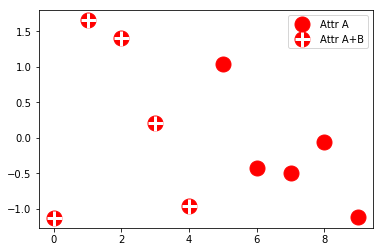

In [55]:
z = np.random.randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])


### Implementing a custom legend handler
A custom handler can be implemented to turn any handle into a legend key (handles don’t necessarily need to be matplotlib artists). The handler must implement a “***legend_artist***” method which returns a single artist for the legend to use. Signature details about the “legend_artist” are documented at legend_artist().

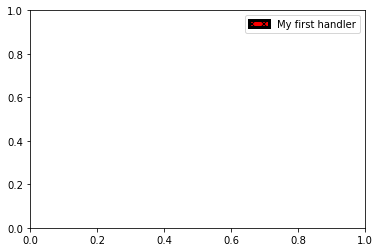

In [56]:
import matplotlib.patches as mpatches

class AnyObject(object):
    pass

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

plt.legend(handles = [AnyObject()], labels = ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})

Alternatively, had we wanted to globally accept AnyObject instances without needing to manually set the handler_map keyword all the time, we could have ***registered the new handler*** with:

In [57]:
from matplotlib.legend import Legend
Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})

Whilst the power here is clear, remember that there are already many handlers implemented and what you want to achieve may already be easily possible with existing classes. For example, to produce elliptical legend keys, rather than rectangular ones:

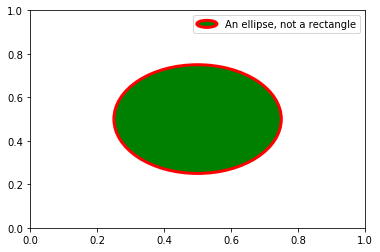

In [58]:
from matplotlib.legend_handler import HandlerPatch 
import matplotlib.patches as mpatches


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})